#**Capstone Project - Bookings.com **

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing files

In [2]:
table1 = pd.read_csv('final1.csv')
table2 = pd.read_csv('final2.csv', encoding='latin1')
table3 = pd.read_csv('final3.csv', encoding='latin1')

Combining the files using merge

In [3]:
result = pd.merge(table1, table2, on='Hotel Name', how='outer')
result = pd.merge(result, table3, left_on='Hotel Name', right_on='HotelName', how='outer')
result.drop('HotelName', axis=1, inplace=True)

result.head()

,Hotel Name,City,Location,StarRating,ReviewScore,Rating,ReviewCount,freewifi,familyrooms,nonsmokingrooms,...,bar,heating,lift,Cuisine1,Cuisine2,Cuisine3,RoomType,DoubleBed,SingleBed,Price
0,Bob W Mitte,Berlin,"Mitte, Berlin",4.0,8.5,Very good,695,Yes,Yes,Yes,...,No,Yes,Yes,Local,American,NaN,Standard Double Room,Yes,No,16581.0
1,Hilton Berlin,Berlin,"Mitte, Berlin",5.0,7.7,Good,"2,379",Yes,Yes,Yes,...,No,Yes,Yes,American,Continental,NaN,Standard Twin Room,Yes,No,22990.0
2,"Hotel Berlin, Berlin, a member of Radisson Ind...",Berlin,"Mitte, Berlin",4.0,7.9,Good,"10,400",Yes,Yes,Yes,...,No,Yes,Yes,International,Ameican,NaN,Cosy Small Room,No,Yes,11223.0
3,Precise Tale Berlin Potsdamer Platz,Berlin,"Friedrichshain-Kreuzberg, Berlin",4.0,8.7,Fabulous,"2,909",Yes,Yes,Yes,...,Yes,Yes,Yes,Vegan,Continental,Full English/Irish,Excelsior Suite,Yes,No,23426.0
4,DoubleTree by Hilton Berlin Ku'damm,Berlin,"Charlottenburg-Wilmersdorf, Berlin",5.0,8.8,Fabulous,309,Yes,Yes,Yes,...,Yes,Yes,Yes,Full English/Irish,Asian,Continental,King Guest Room,Yes,No,14961.0


In [4]:
df = result.drop_duplicates(subset='Hotel Name')
df.reset_index(drop=True, inplace=True)

In [5]:
df = df.rename(columns={'ReviewScore': 'Rating', 'Rating': 'ReviewScore'})

In [6]:
file_path = 'final_combined.csv'
df.to_csv(file_path, index=False)

print(f"CSV file '{file_path}' has been saved.")

CSV file 'final_combined.csv' has been saved.


Data Cleaning

In [7]:
df_cleaned = df.copy()

problematic_reviewcount = df_cleaned['ReviewCount'][pd.to_numeric(df_cleaned['ReviewCount'], errors='coerce').isna()]

df_cleaned['ReviewCount'] = pd.to_numeric(df_cleaned['ReviewCount'].str.replace(',', ''), errors='coerce')

df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Price'])

df_cleaned.reset_index(drop=True, inplace=True)

# EDA

1. Data Overview:

In [8]:
df_cleaned.head()

,Hotel Name,City,Location,StarRating,Rating,ReviewScore,ReviewCount,freewifi,familyrooms,nonsmokingrooms,...,bar,heating,lift,Cuisine1,Cuisine2,Cuisine3,RoomType,DoubleBed,SingleBed,Price
0,Bob W Mitte,Berlin,"Mitte, Berlin",4.0,8.5,Very good,695.0,Yes,Yes,Yes,...,No,Yes,Yes,Local,American,NaN,Standard Double Room,Yes,No,16581.0
1,Hilton Berlin,Berlin,"Mitte, Berlin",5.0,7.7,Good,2379.0,Yes,Yes,Yes,...,No,Yes,Yes,American,Continental,NaN,Standard Twin Room,Yes,No,22990.0
2,"Hotel Berlin, Berlin, a member of Radisson Ind...",Berlin,"Mitte, Berlin",4.0,7.9,Good,10400.0,Yes,Yes,Yes,...,No,Yes,Yes,International,Ameican,NaN,Cosy Small Room,No,Yes,11223.0
3,Precise Tale Berlin Potsdamer Platz,Berlin,"Friedrichshain-Kreuzberg, Berlin",4.0,8.7,Fabulous,2909.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Vegan,Continental,Full English/Irish,Excelsior Suite,Yes,No,23426.0
4,DoubleTree by Hilton Berlin Ku'damm,Berlin,"Charlottenburg-Wilmersdorf, Berlin",5.0,8.8,Fabulous,309.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Full English/Irish,Asian,Continental,King Guest Room,Yes,No,14961.0


In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel Name       1582 non-null   object 
 1   City             1524 non-null   object 
 2   Location         1524 non-null   object 
 3   StarRating       1304 non-null   float64
 4   Rating           1304 non-null   float64
 5   ReviewScore      1304 non-null   object 
 6   ReviewCount      1346 non-null   float64
 7   freewifi         1582 non-null   object 
 8   familyrooms      1582 non-null   object 
 9   nonsmokingrooms  1582 non-null   object 
 10  restaurant       1582 non-null   object 
 11  bar              1582 non-null   object 
 12  heating          1582 non-null   object 
 13  lift             1582 non-null   object 
 14  Cuisine1         1558 non-null   object 
 15  Cuisine2         1401 non-null   object 
 16  Cuisine3         942 non-null    object 
 17  RoomType      

In [10]:
df_cleaned.shape

(1582, 21)

2. Statistical Summary:

In [11]:
df_cleaned.describe()

,StarRating,Rating,ReviewCount,Price
count,1304.000000,1304.000000,1346.000000,1582.000000
mean,3.712807,7.834663,2522.332838,15751.660556
std,0.810615,0.991682,2884.586172,10038.180891
min,1.000000,2.500000,1.000000,941.000000
25%,3.000000,7.400000,622.250000,9130.000000
50%,4.000000,8.000000,1695.000000,13402.500000
75%,4.000000,8.500000,3354.500000,19909.250000
max,5.000000,10.000000,28066.000000,118967.000000


StarRating:

* The "StarRating" ranges from 1 to 5, indicating the star rating of the hotels.
* The average star rating is approximately 3.71, which suggests that most of the hotels have a rating between 3 and 4 stars.
* The standard deviation is 0.81, indicating some variation in star ratings.
* The minimum rating is 1, and the maximum is 5, which is expected for a star rating.

ReviewScore:

* The "ReviewScore" ranges from 2.5 to 10.0.
* The average review score is approximately 7.83, which suggests that most hotels have relatively positive reviews.
* The standard deviation is 0.99, indicating some variation in review scores.
* The minimum review score is 2.5, and the maximum is 10.0.

ReviewCount:

* The "ReviewCount" ranges from 1 to 28,066.
* The average number of reviews is approximately 2,522, indicating that some hotels have a substantial number of reviews.
* The standard deviation is relatively high at 2,884, indicating a wide range of review counts.
* The minimum review count is 1, and the maximum is 28,066.

Price:

* The "Price" ranges from 941 to 118,967.
* The average price is approximately 15,752, suggesting a wide range of hotel prices in the dataset.
* The standard deviation is approximately 10,038, indicating significant price variability.
* The minimum price is 941, and the maximum is 118,967.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Histogram of Star Ratings:

The majority of hotels in the dataset have a 4-star rating.

Few hotels have 1-star or 5-star ratings.

The distribution is slightly right-skewed.

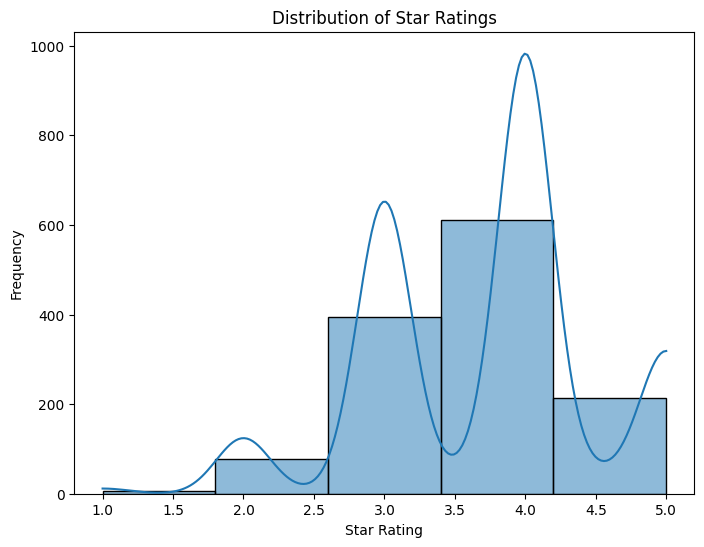

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['StarRating'], bins=5, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

Histogram of Review Scores:

Review scores are concentrated around 7.5 to 8.5, indicating generally positive feedback.
The distribution is unimodal, with a peak around 8.

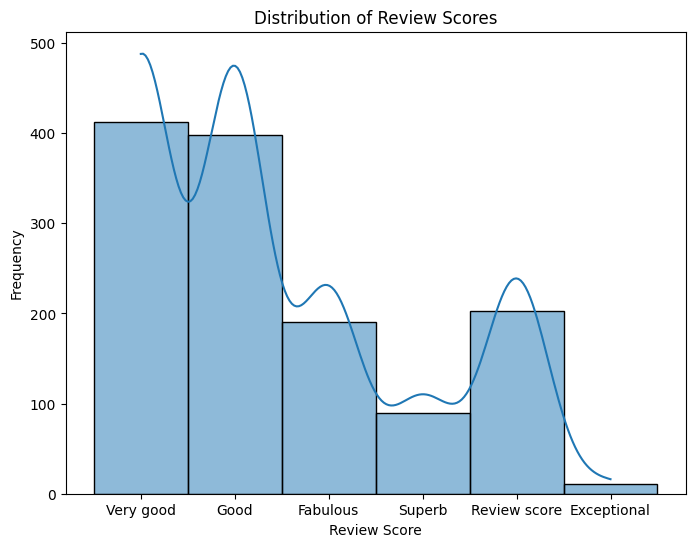

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['ReviewScore'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

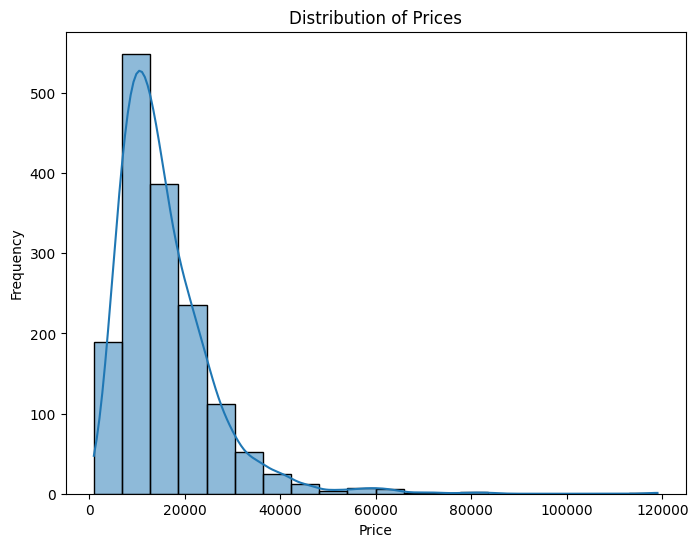

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

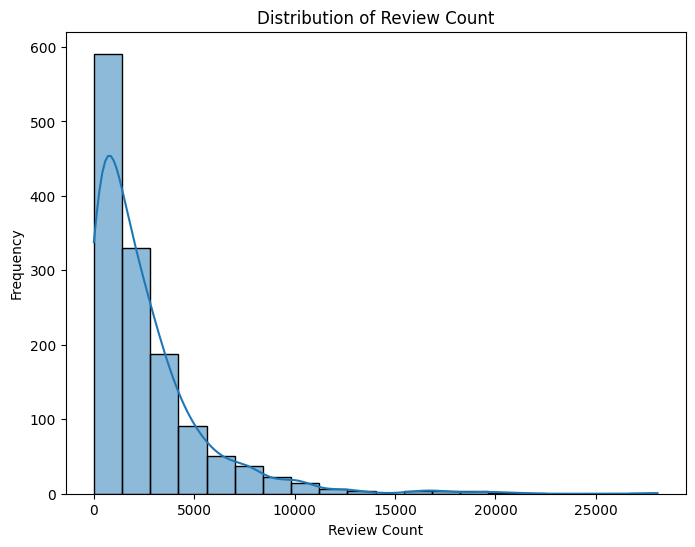

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['ReviewCount'], bins=20, kde=True)
plt.title('Distribution of Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

Scatter Plot of Price vs. Review Count:

There is no clear linear relationship between the price of a hotel room and the number of reviews it receives.
Hotels with varying prices can have a wide range of review counts.

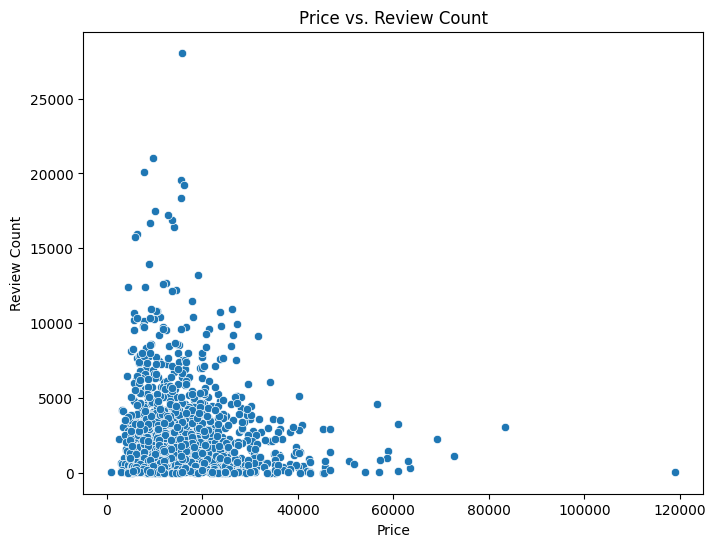

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Price', y='ReviewCount')
plt.title('Price vs. Review Count')
plt.xlabel('Price')
plt.ylabel('Review Count')
plt.show()

Box Plot of Star Ratings:

Higher-rated hotels tend to have higher prices on average.
3-star hotels generally have lower prices, while 4 and 5-star hotels have a wider price range.
There are some outliers in each star rating category.

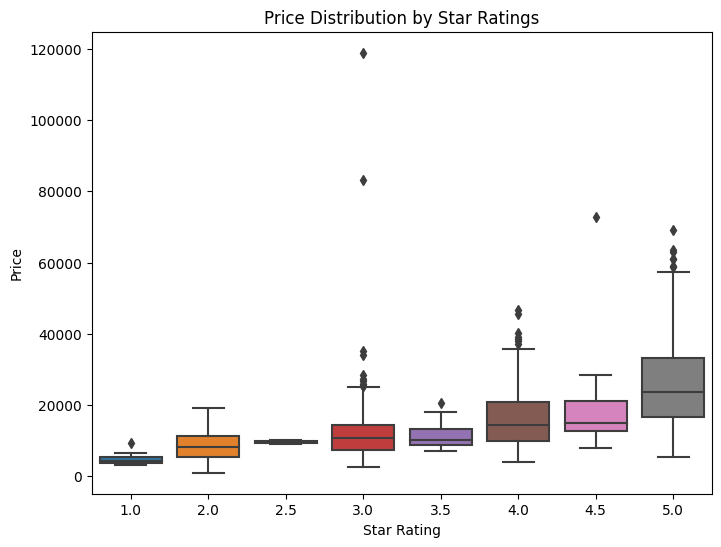

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='StarRating', y='Price')
plt.title('Price Distribution by Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()

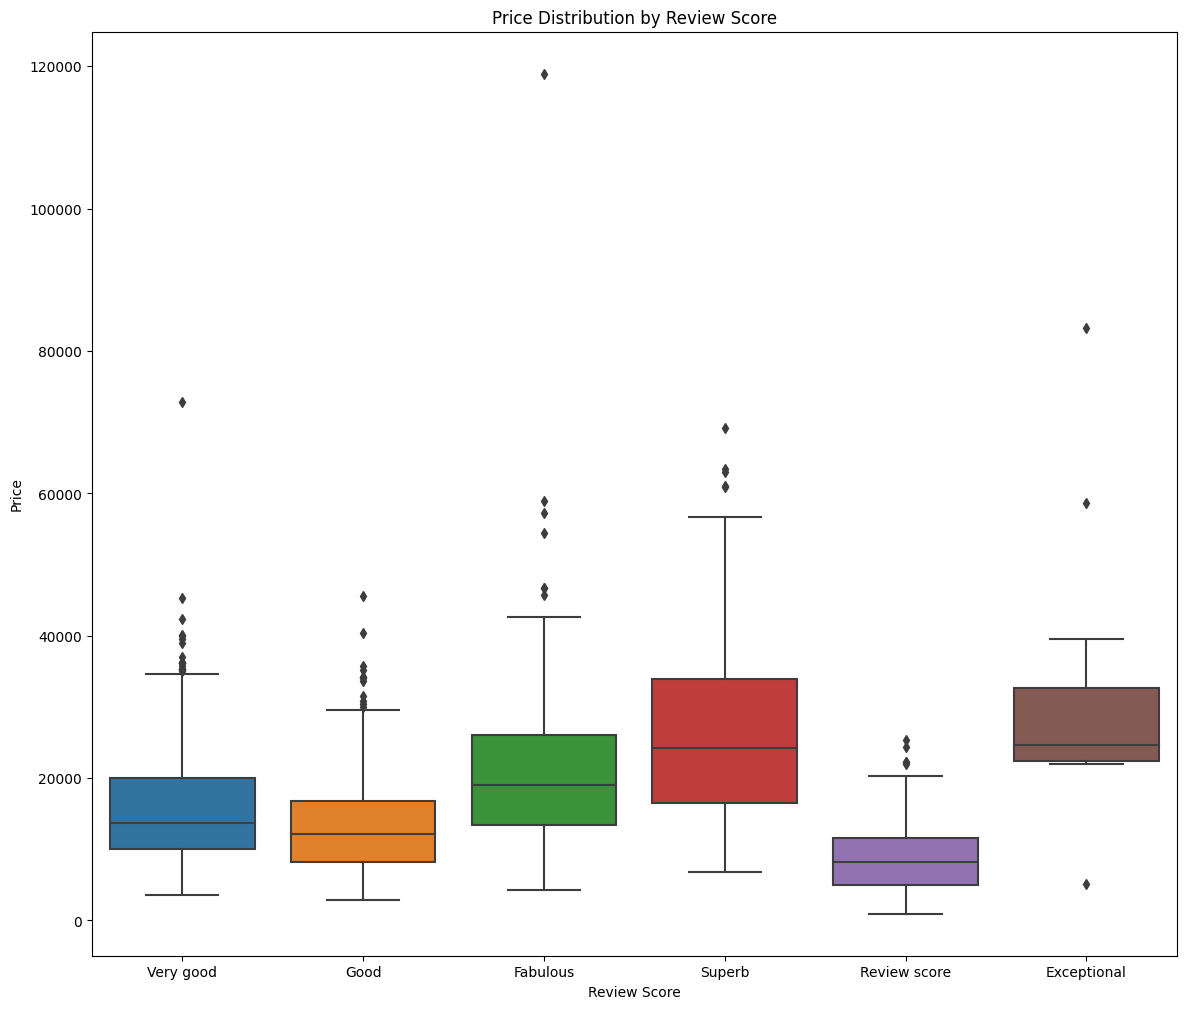

In [19]:
plt.figure(figsize=(14, 12))
sns.boxplot(data=df_cleaned, x='ReviewScore', y='Price')
plt.title('Price Distribution by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.show()

Bar Plot of Star Ratings:

4-star hotels are the most common, followed by 5-star hotels.
The distribution shows that the dataset contains a relatively high number of 4-star hotels.

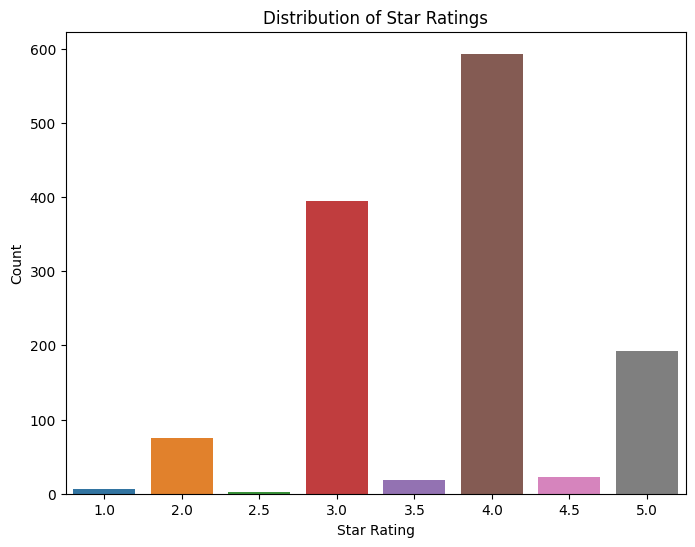

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='StarRating')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

Bar Plot of Review Scores:

Most reviews fall within the 7 to 8.5 range.
8.0 and 7.5 are the most frequent review scores

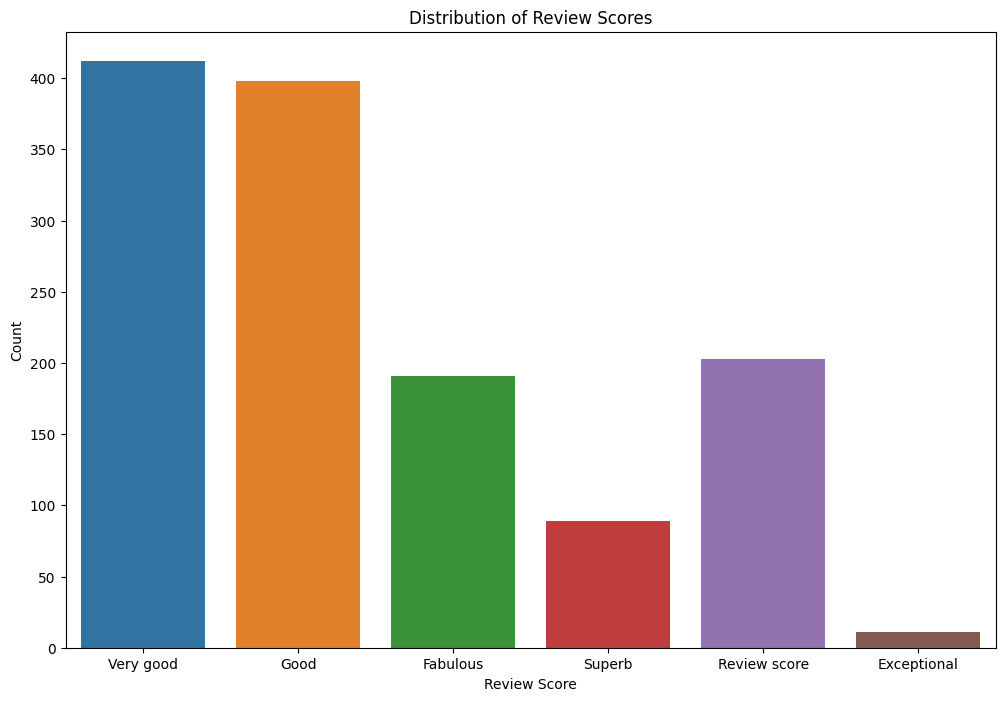

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='ReviewScore')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

Pair Plot:

The pair plot with hue distinguishes scatterplots for each combination of star rating.
It shows that higher-rated hotels tend to have higher prices and more reviews.

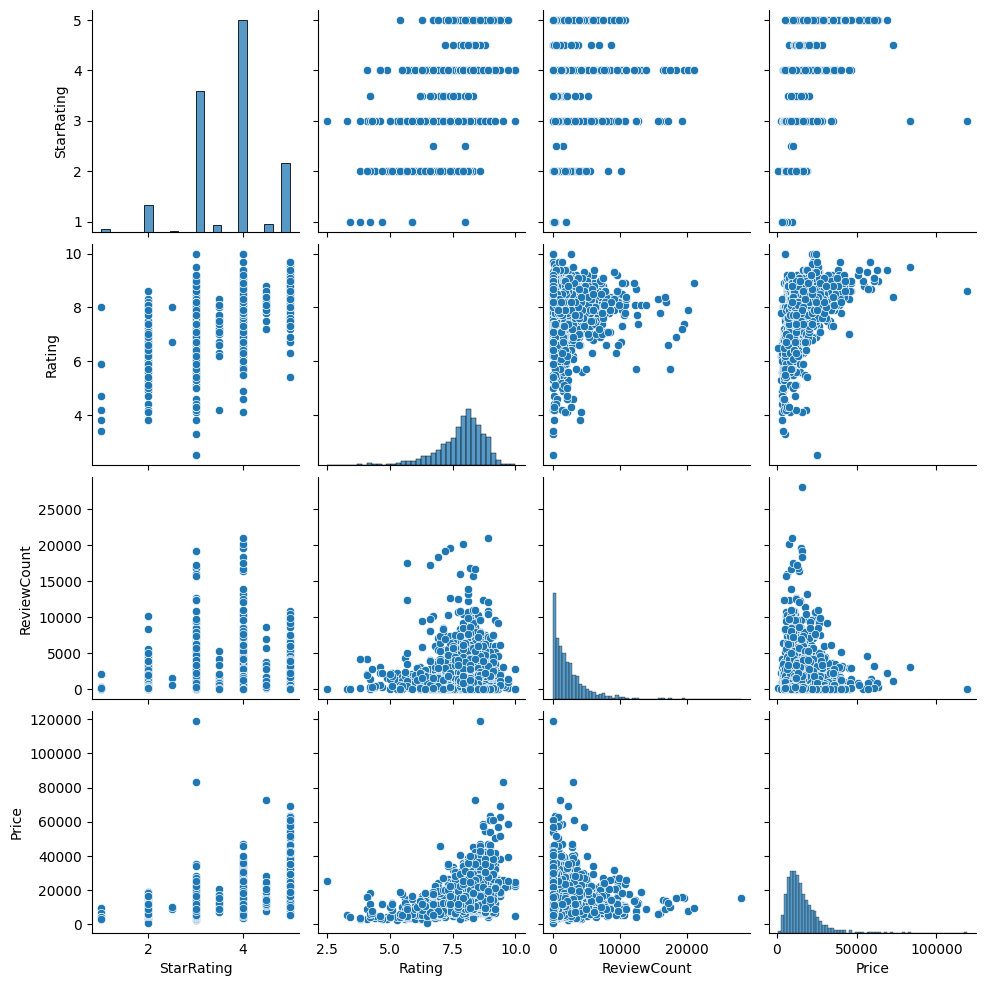

In [22]:
sns.pairplot(df_cleaned)
plt.show()

Bar Plot of Average Prices by Star Rating:


The pair plot with hue distinguishes scatterplots for each combination of star rating.
It shows that higher-rated hotels tend to have higher prices and more reviews.

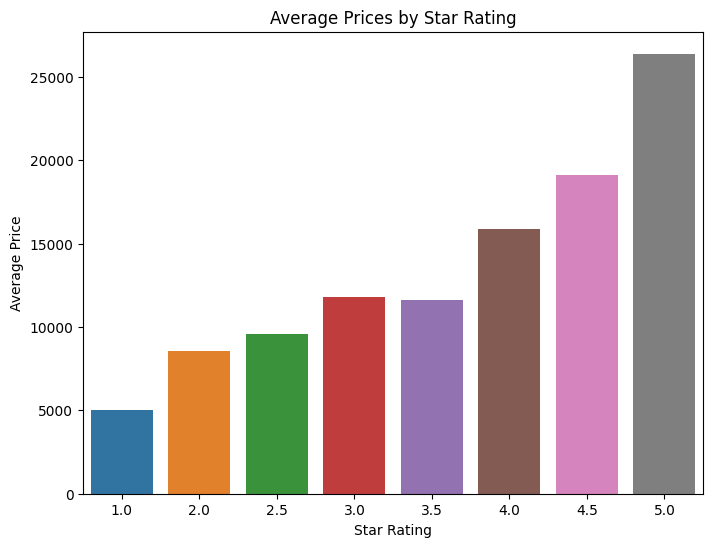

In [23]:
avg_price_by_rating = df_cleaned.groupby('StarRating')['Price'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values)
plt.title('Average Prices by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Price')
plt.show()

Box Plot of Price by Star Rating:


3-star hotels have a narrower price range compared to 4 and 5-star hotels.
Higher-rated hotels exhibit a larger price spread with potential outliers.

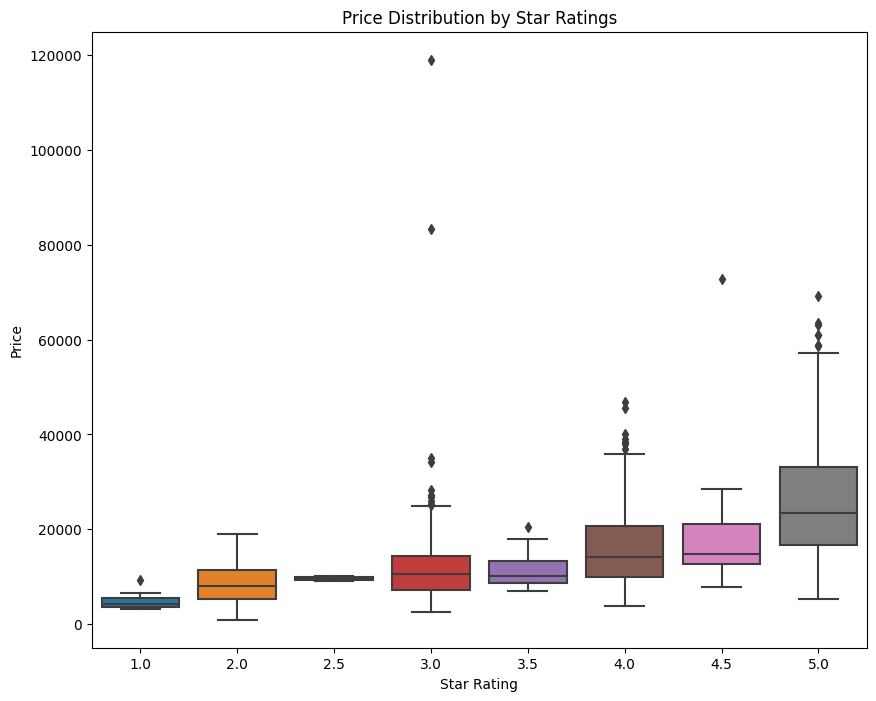

In [24]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned, x='StarRating', y='Price')
plt.title('Price Distribution by Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()

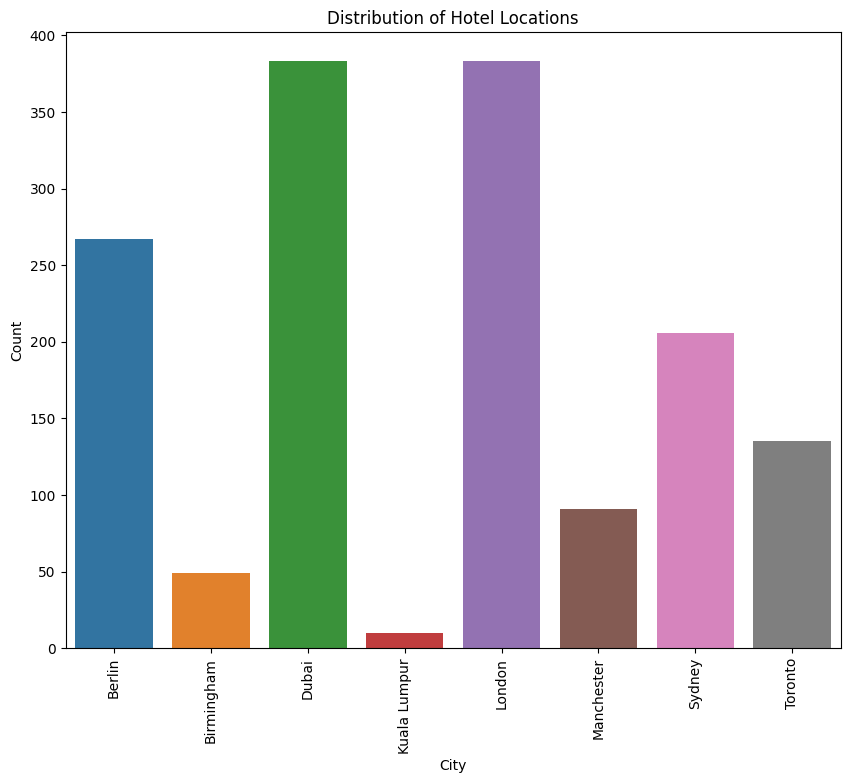

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_cleaned, x='City')
plt.title('Distribution of Hotel Locations')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

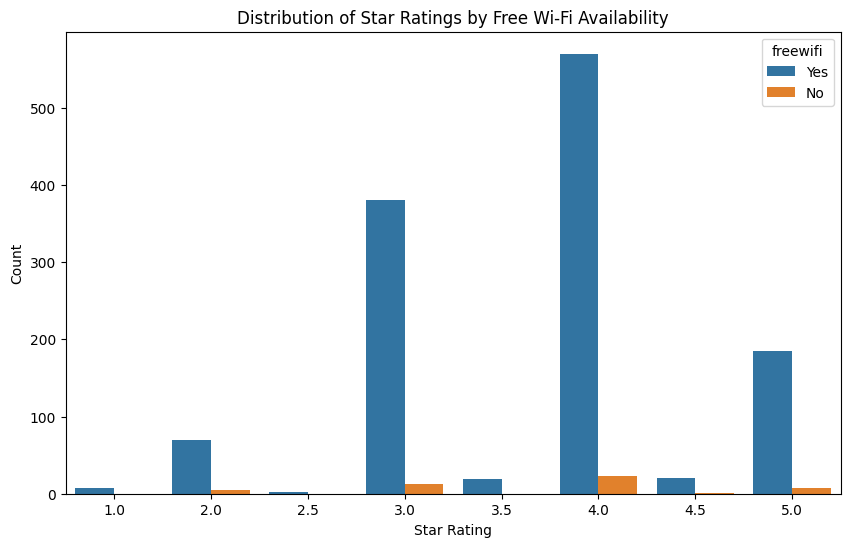

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='StarRating', hue='freewifi')
plt.title('Distribution of Star Ratings by Free Wi-Fi Availability')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

Pie Chart for Categorical Data:

The pie chart displays the distribution of hotel locations.
It shows the proportion of each location category.

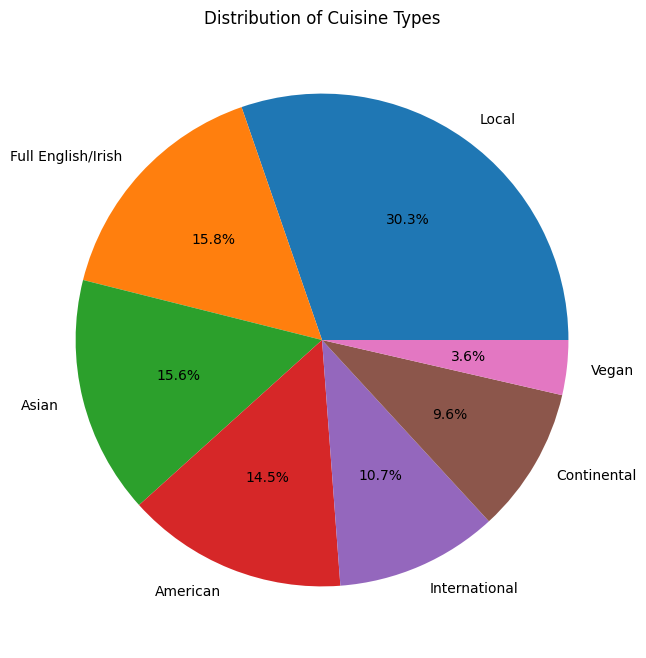

In [27]:
category_counts = df_cleaned['Cuisine1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Cuisine Types')
plt.show()

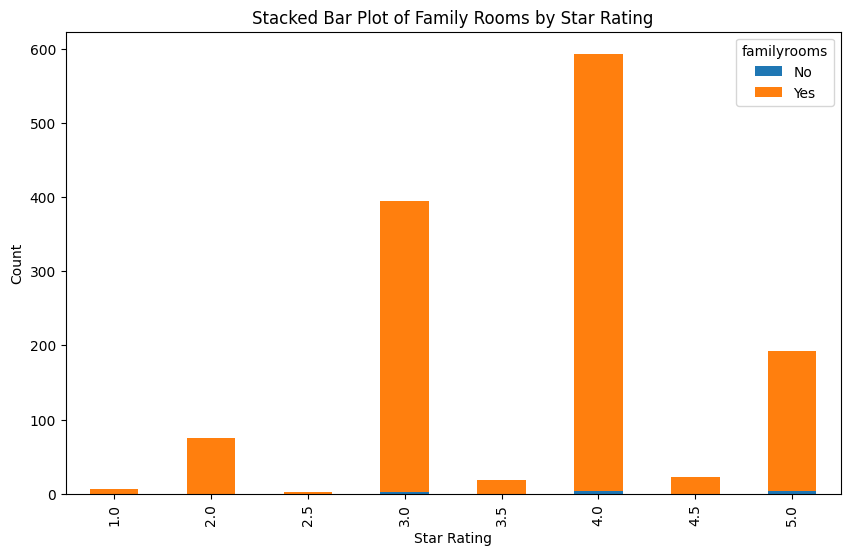

In [28]:
stacked_data = df_cleaned.groupby(['StarRating', 'familyrooms'])['Hotel Name'].count().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Family Rooms by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

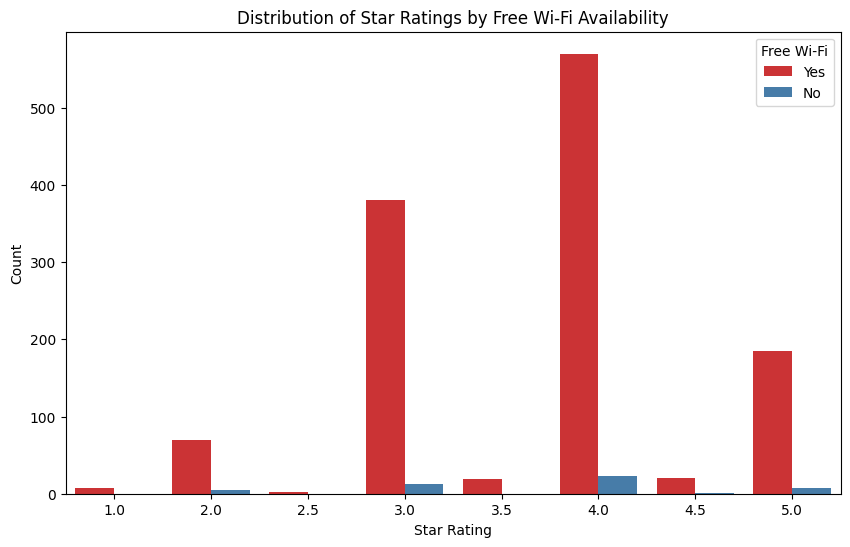

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='StarRating', hue='freewifi', palette='Set1')
plt.title('Distribution of Star Ratings by Free Wi-Fi Availability')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.legend(title='Free Wi-Fi')
plt.show()

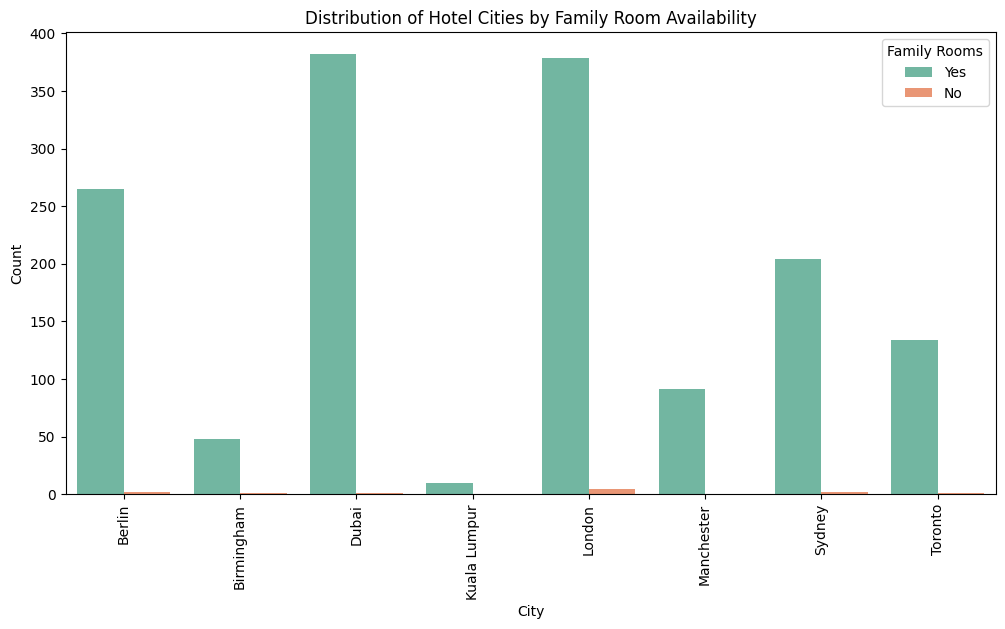

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='City', hue='familyrooms', palette='Set2')
plt.title('Distribution of Hotel Cities by Family Room Availability')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Family Rooms')
plt.show()

<Figure size 1200x800 with 0 Axes>

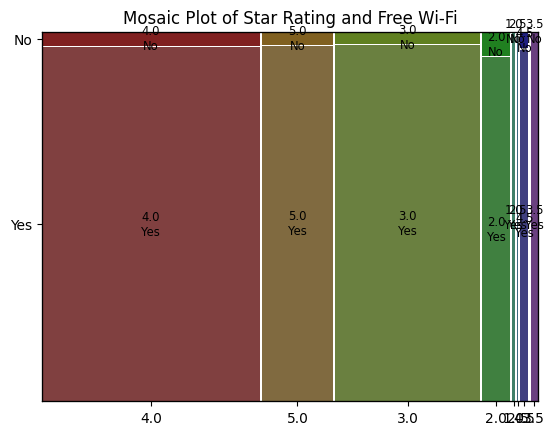

In [31]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(12, 8))
mosaic(df_cleaned, ['StarRating', 'freewifi'], title='Mosaic Plot of Star Rating and Free Wi-Fi')
plt.show()

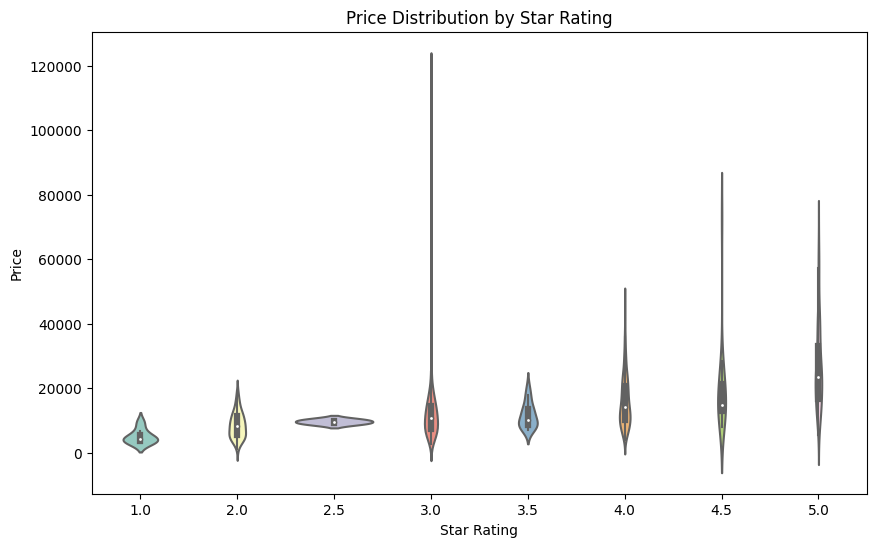

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cleaned, x='StarRating', y='Price', palette='Set3')
plt.title('Price Distribution by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()

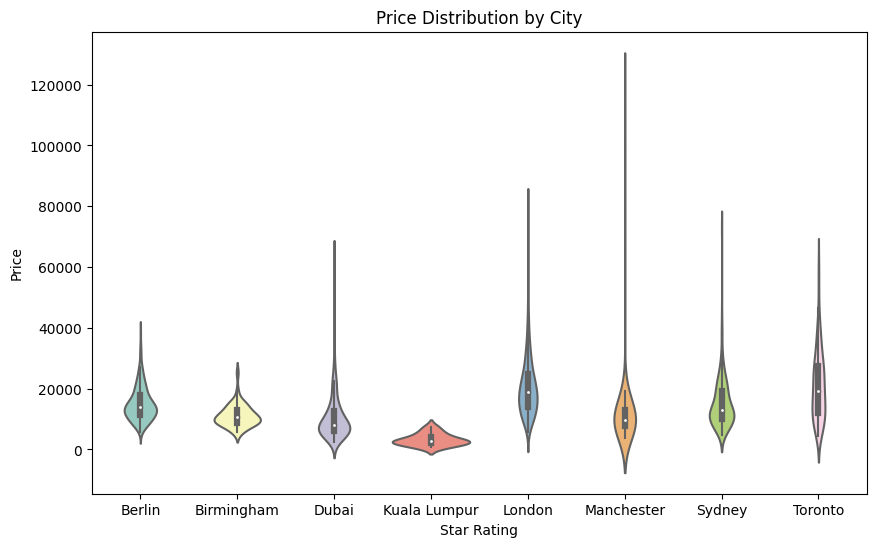

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_cleaned, x='City', y='Price', palette='Set3')
plt.title('Price Distribution by City')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()

Correlation maps and heatmaps

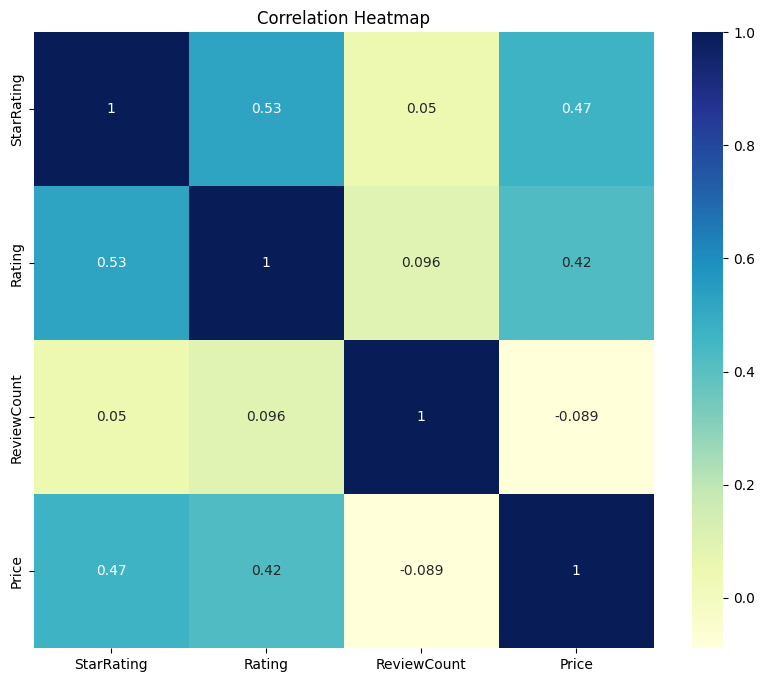

In [34]:
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

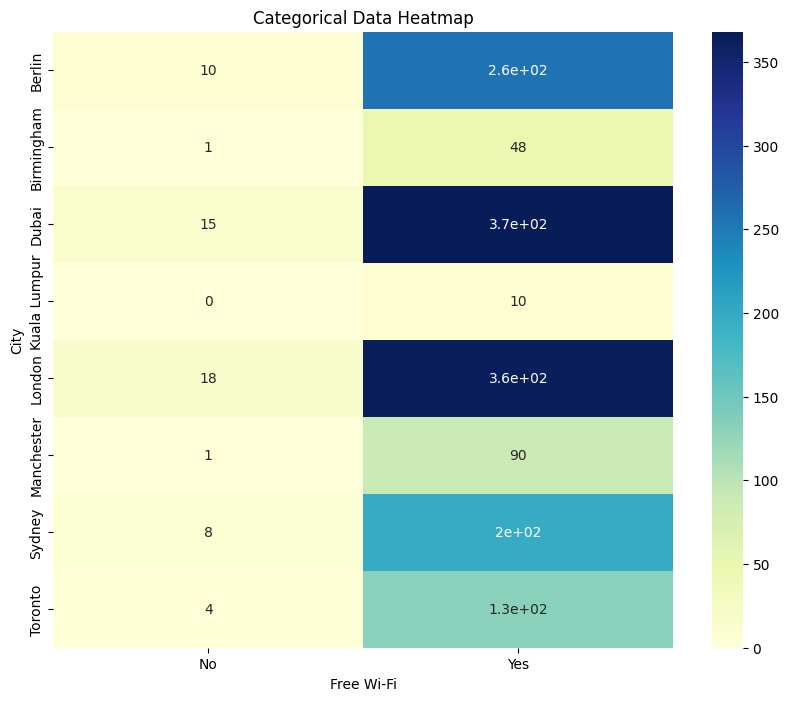

In [35]:
crosstab = pd.crosstab(df_cleaned['City'], df_cleaned['freewifi'])
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title('Categorical Data Heatmap')
plt.xlabel('Free Wi-Fi')
plt.ylabel('City')
plt.show()

Distribuition of Hotels in different cities.

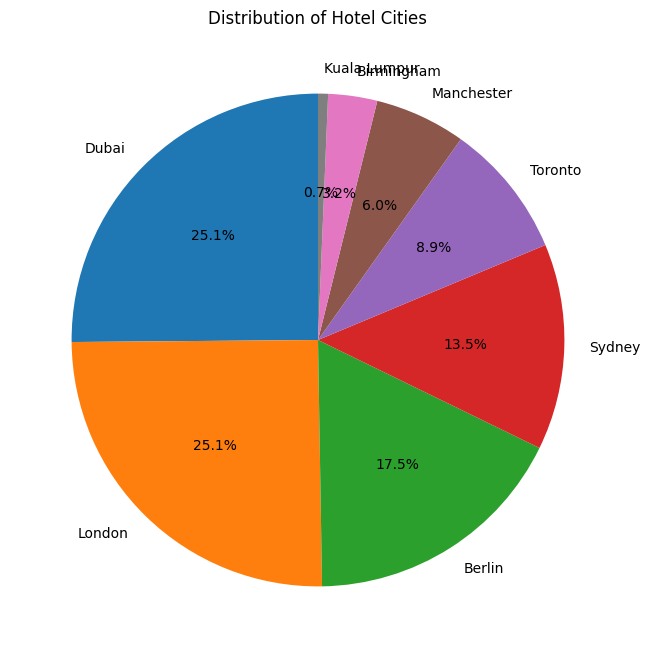

In [36]:
category_counts = df_cleaned['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Hotel Cities')
plt.show()

# Machine Learning

Importing the necessary libraries

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [38]:
df_cleaned.head()

,Hotel Name,City,Location,StarRating,Rating,ReviewScore,ReviewCount,freewifi,familyrooms,nonsmokingrooms,...,bar,heating,lift,Cuisine1,Cuisine2,Cuisine3,RoomType,DoubleBed,SingleBed,Price
0,Bob W Mitte,Berlin,"Mitte, Berlin",4.0,8.5,Very good,695.0,Yes,Yes,Yes,...,No,Yes,Yes,Local,American,NaN,Standard Double Room,Yes,No,16581.0
1,Hilton Berlin,Berlin,"Mitte, Berlin",5.0,7.7,Good,2379.0,Yes,Yes,Yes,...,No,Yes,Yes,American,Continental,NaN,Standard Twin Room,Yes,No,22990.0
2,"Hotel Berlin, Berlin, a member of Radisson Ind...",Berlin,"Mitte, Berlin",4.0,7.9,Good,10400.0,Yes,Yes,Yes,...,No,Yes,Yes,International,Ameican,NaN,Cosy Small Room,No,Yes,11223.0
3,Precise Tale Berlin Potsdamer Platz,Berlin,"Friedrichshain-Kreuzberg, Berlin",4.0,8.7,Fabulous,2909.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Vegan,Continental,Full English/Irish,Excelsior Suite,Yes,No,23426.0
4,DoubleTree by Hilton Berlin Ku'damm,Berlin,"Charlottenburg-Wilmersdorf, Berlin",5.0,8.8,Fabulous,309.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Full English/Irish,Asian,Continental,King Guest Room,Yes,No,14961.0


In [39]:
df_cleaned.columns

Index(['Hotel Name', 'City', 'Location', 'StarRating', 'Rating', 'ReviewScore',
       'ReviewCount', 'freewifi', 'familyrooms', 'nonsmokingrooms',
       'restaurant', 'bar', 'heating', 'lift', 'Cuisine1', 'Cuisine2',
       'Cuisine3', 'RoomType', 'DoubleBed', 'SingleBed', 'Price'],
      dtype='object')

In [40]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel Name       1582 non-null   object 
 1   City             1524 non-null   object 
 2   Location         1524 non-null   object 
 3   StarRating       1304 non-null   float64
 4   Rating           1304 non-null   float64
 5   ReviewScore      1304 non-null   object 
 6   ReviewCount      1346 non-null   float64
 7   freewifi         1582 non-null   object 
 8   familyrooms      1582 non-null   object 
 9   nonsmokingrooms  1582 non-null   object 
 10  restaurant       1582 non-null   object 
 11  bar              1582 non-null   object 
 12  heating          1582 non-null   object 
 13  lift             1582 non-null   object 
 14  Cuisine1         1558 non-null   object 
 15  Cuisine2         1401 non-null   object 
 16  Cuisine3         942 non-null    object 
 17  RoomType      

Data Preprocessing

Replacing Missing Values with Mean for numeric columns

In [41]:
numeric_columns = ['StarRating', 'Rating', 'ReviewCount', 'Price']

for column in numeric_columns:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
    mean_value = df_cleaned[column].mean()
    df_cleaned[column].fillna(mean_value, inplace=True)

Replacing Missing Values with Mode for categorical text columns

In [42]:
text_columns = ['City', 'Location', 'ReviewScore', 'Cuisine1', 'Cuisine2', 'Cuisine3']
for column in text_columns:
    mode_value = df_cleaned[column].mode()[0]
    df_cleaned[column].fillna(mode_value, inplace=True)

In [43]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hotel Name       1582 non-null   object 
 1   City             1582 non-null   object 
 2   Location         1582 non-null   object 
 3   StarRating       1582 non-null   float64
 4   Rating           1582 non-null   float64
 5   ReviewScore      1582 non-null   object 
 6   ReviewCount      1582 non-null   float64
 7   freewifi         1582 non-null   object 
 8   familyrooms      1582 non-null   object 
 9   nonsmokingrooms  1582 non-null   object 
 10  restaurant       1582 non-null   object 
 11  bar              1582 non-null   object 
 12  heating          1582 non-null   object 
 13  lift             1582 non-null   object 
 14  Cuisine1         1582 non-null   object 
 15  Cuisine2         1582 non-null   object 
 16  Cuisine3         1582 non-null   object 
 17  RoomType      

In [44]:
df_cleaned.head()

,Hotel Name,City,Location,StarRating,Rating,ReviewScore,ReviewCount,freewifi,familyrooms,nonsmokingrooms,...,bar,heating,lift,Cuisine1,Cuisine2,Cuisine3,RoomType,DoubleBed,SingleBed,Price
0,Bob W Mitte,Berlin,"Mitte, Berlin",4.0,8.5,Very good,695.0,Yes,Yes,Yes,...,No,Yes,Yes,Local,American,Continental,Standard Double Room,Yes,No,16581.0
1,Hilton Berlin,Berlin,"Mitte, Berlin",5.0,7.7,Good,2379.0,Yes,Yes,Yes,...,No,Yes,Yes,American,Continental,Continental,Standard Twin Room,Yes,No,22990.0
2,"Hotel Berlin, Berlin, a member of Radisson Ind...",Berlin,"Mitte, Berlin",4.0,7.9,Good,10400.0,Yes,Yes,Yes,...,No,Yes,Yes,International,Ameican,Continental,Cosy Small Room,No,Yes,11223.0
3,Precise Tale Berlin Potsdamer Platz,Berlin,"Friedrichshain-Kreuzberg, Berlin",4.0,8.7,Fabulous,2909.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Vegan,Continental,Full English/Irish,Excelsior Suite,Yes,No,23426.0
4,DoubleTree by Hilton Berlin Ku'damm,Berlin,"Charlottenburg-Wilmersdorf, Berlin",5.0,8.8,Fabulous,309.0,Yes,Yes,Yes,...,Yes,Yes,Yes,Full English/Irish,Asian,Continental,King Guest Room,Yes,No,14961.0


In [45]:
df_cleaned2 = df_cleaned

In [46]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = ['StarRating', 'RoomType', 'DoubleBed', 'SingleBed','freewifi','familyrooms','nonsmokingrooms','bar','heating','restaurant','lift','City', 'Location', 'ReviewScore', 'Cuisine1', 'Cuisine2', 'Cuisine3']

label_encoder = LabelEncoder()
for column in ordinal_categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

Part 1 : Price Prediction

In [47]:
X = df_cleaned.drop(['Price','Hotel Name','RoomType'], axis=1)
y_price = df_cleaned['Price']

X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_price_train)
    price_predictions = model.predict(X_test)

    mae = mean_absolute_error(y_price_test, price_predictions)
    mse = mean_squared_error(y_price_test, price_predictions)
    rmse = mean_squared_error(y_price_test, price_predictions, squared=False)
    r2 = r2_score(y_price_test, price_predictions)
    explained_variance = explained_variance_score(y_price_test, price_predictions)

    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared (R2)": r2,
        "Explained Variance": explained_variance
    }


for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.2f}")
    print("\n")

Linear Regression:
MAE: 5418.66
MSE: 52039944.49
RMSE: 7213.87
R-squared (R2): 0.32
Explained Variance: 0.32


Lasso Regression:
MAE: 5418.17
MSE: 52037087.68
RMSE: 7213.67
R-squared (R2): 0.32
Explained Variance: 0.32


Ridge Regression:
MAE: 5418.02
MSE: 52032912.75
RMSE: 7213.38
R-squared (R2): 0.32
Explained Variance: 0.32


Decision Tree:
MAE: 5661.46
MSE: 96148410.66
RMSE: 9805.53
R-squared (R2): -0.26
Explained Variance: -0.25


Random Forest:
MAE: 4239.86
MSE: 41675235.79
RMSE: 6455.64
R-squared (R2): 0.45
Explained Variance: 0.47


Gradient Boosting:
MAE: 3996.49
MSE: 43825310.08
RMSE: 6620.07
R-squared (R2): 0.42
Explained Variance: 0.44




Based on these metrics, the "Random Forest" model has the lowest RMSE and relatively higher R-squared and explained variance scores compared to other models. Hence, we will be going ahead with Random Forest Regressor.

Checking the feature importance for Random Forest model

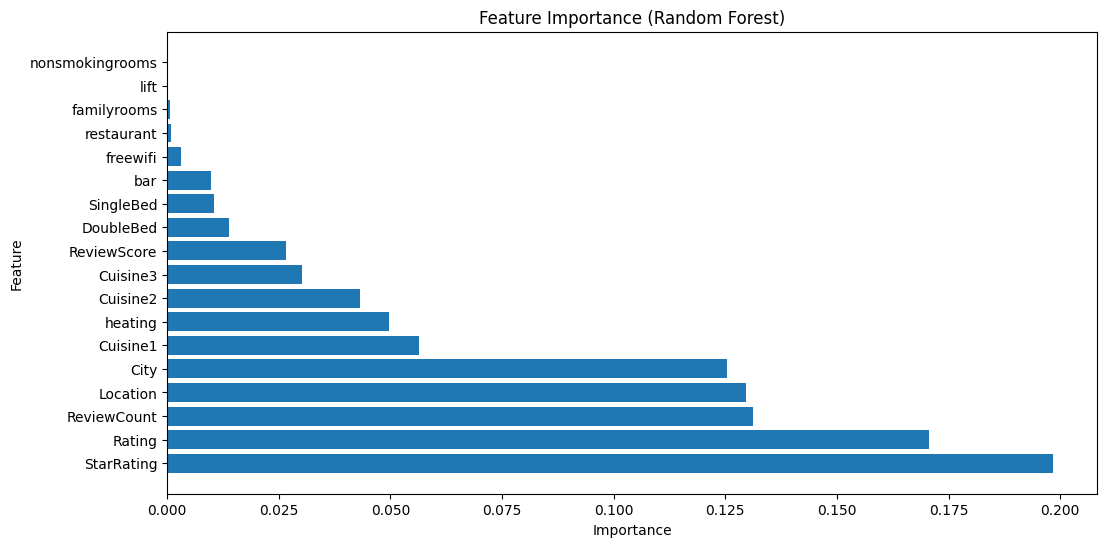

            Feature  Importance
2        StarRating    0.198367
3            Rating    0.170728
5       ReviewCount    0.131098
1          Location    0.129627
0              City    0.125273
13         Cuisine1    0.056434
11          heating    0.049693
14         Cuisine2    0.043245
15         Cuisine3    0.030145
4       ReviewScore    0.026595
16        DoubleBed    0.013911
17        SingleBed    0.010471
10              bar    0.009711
6          freewifi    0.003160
9        restaurant    0.000901
7       familyrooms    0.000573
12             lift    0.000068
8   nonsmokingrooms    0.000000


In [50]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_price_train)

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

print(importance_df)

Feature Selection by deleting the least importance features.

In [51]:
features_to_drop = ["nonsmokingrooms", "lift", "familyrooms", "restaurant", "freewifi","bar"]

X = X.drop(features_to_drop, axis=1)

In [52]:
X_train_price, X_test_price, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

In [53]:
X_train_price = scaler.fit_transform(X_train_price)
X_test_price = scaler.transform(X_test_price)

In [54]:
X.head()

,City,Location,StarRating,Rating,ReviewScore,ReviewCount,heating,Cuisine1,Cuisine2,Cuisine3,DoubleBed,SingleBed
0,0,84,6,8.5,5,695.0,1,5,1,1,1,0
1,0,84,8,7.7,2,2379.0,1,0,3,1,1,0
2,0,84,6,7.9,2,10400.0,1,4,0,1,0,1
3,0,55,6,8.7,1,2909.0,1,6,3,2,1,0
4,0,25,8,8.8,1,309.0,1,3,2,1,1,0


In [55]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train_price, y_price_train)

y_price_pred = rf_model.predict(X_test_price)

Evaluation Metrics

In [56]:
mae = mean_absolute_error(y_price_test, y_price_pred)
mse = mean_squared_error(y_price_test, y_price_pred)
rmse = mean_squared_error(y_price_test, y_price_pred, squared=False)
r2 = r2_score(y_price_test, y_price_pred)
explained_variance = explained_variance_score(y_price_test, y_price_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

MAE: 4251.17
MSE: 42969160.16
RMSE: 6555.09
R-squared (R2): 0.44
Explained Variance: 0.45


Cross Validation

In [57]:
from sklearn.model_selection import KFold, cross_val_score
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X, y_price, scoring='neg_mean_squared_error', cv=kf)

rmse_scores = [abs(score) ** 0.5 for score in scores]

for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.2f}')

Fold 1 RMSE: 6515.30
Fold 2 RMSE: 6089.89
Fold 3 RMSE: 8109.80
Fold 4 RMSE: 9333.00
Fold 5 RMSE: 7739.01


Hyperparameter Tuning

In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train_price, y_price_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [59]:
best_params = grid_search.best_params_

In [60]:
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train_price, y_price_train)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=300, random_state=42)

In [61]:
y_price_pred = best_rf_model.predict(X_test_price)

mae = mean_absolute_error(y_price_test, y_price_pred)
mse = mean_squared_error(y_price_test, y_price_pred)
rmse = mean_squared_error(y_price_test, y_price_pred, squared=False)
r2 = r2_score(y_price_test, y_price_pred)
explained_variance = explained_variance_score(y_price_test, y_price_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Explained Variance: {explained_variance:.2f}")

MAE: 3984.74
MSE: 33280922.99
RMSE: 5768.96
R-squared (R2): 0.56
Explained Variance: 0.57


In [62]:
from sklearn.model_selection import KFold, cross_val_score
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_rf_model, X, y_price, scoring='neg_mean_squared_error', cv=kf)

rmse_scores = [abs(score) ** 0.5 for score in scores]

for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.2f}')

Fold 1 RMSE: 5766.67
Fold 2 RMSE: 5790.16
Fold 3 RMSE: 7195.43
Fold 4 RMSE: 9150.90
Fold 5 RMSE: 7487.37


After Hyperparameter Tuning and cross validation, the model performance has improved. Based on Cross Validation, the model performance is more consistent.

Visualizing the price results

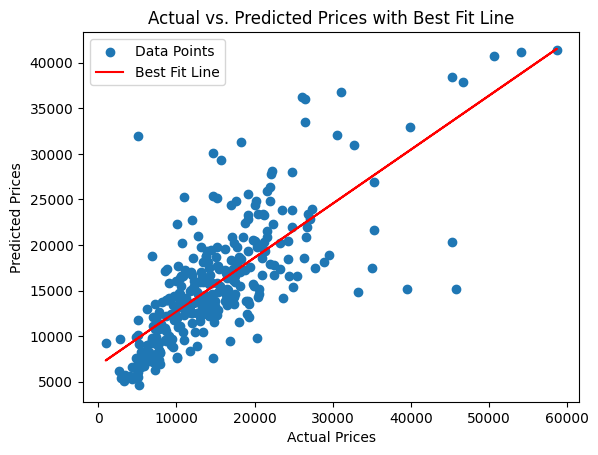

In [63]:
plt.scatter(y_price_test, y_price_pred, label="Data Points")

slope, intercept = np.polyfit(y_price_test, y_price_pred, 1)
best_fit_line = slope * y_price_test + intercept

plt.plot(y_price_test, best_fit_line, color='red', label="Best Fit Line")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Best Fit Line")
plt.legend()

plt.show()

In [64]:
import joblib

model1 = best_rf_model
model_filename1 = 'model_filename1.pkl'

joblib.dump(model1, model_filename1)

print(f"Model saved as {model_filename1}")

Model saved as model_filename1.pkl


In [65]:
loaded_model = joblib.load('model_filename1.pkl')

In [66]:
data = {
    'StarRating': [4.0, 5.0, 4.0, 4.0, 5.0],
    'Rating': [8.5, 7.7, 7.9, 8.7, 8.8],
    'ReviewCount': [695, 2379, 10400, 2909, 309],
    'Location': [84, 84, 84, 55, 25],
    'Cuisine1': ['Local', 'American', 'International', 'Vegan', 'Full English/Irish'],
    'ReviewScore': ['Good','Pleasant', 'Superb', 'Fabulous', 'Very Good'],
    'DoubleBed': [1, 1, 0, 1, 1],
    'SingleBed': [0, 0, 1, 0, 0],
    'nonsmokingrooms':['Yes', 'Yes', 'No','Yes', 'Yes'],
    'lift':['Yes', 'No','Yes', 'Yes', 'Yes'],
    'familyrooms':['Yes', 'Yes','Yes', 'Yes', 'Yes'],
    'restaurant':['Yes', 'Yes','Yes', 'Yes', 'Yes']
}

df_rf = pd.DataFrame(data)

print(df_rf)

   StarRating  Rating  ReviewCount  Location            Cuisine1 ReviewScore  \
0         4.0     8.5          695        84               Local        Good   
1         5.0     7.7         2379        84            American    Pleasant   
2         4.0     7.9        10400        84       International      Superb   
3         4.0     8.7         2909        55               Vegan    Fabulous   
4         5.0     8.8          309        25  Full English/Irish   Very Good   

   DoubleBed  SingleBed nonsmokingrooms lift familyrooms restaurant  
0          1          0             Yes  Yes         Yes        Yes  
1          1          0             Yes   No         Yes        Yes  
2          0          1              No  Yes         Yes        Yes  
3          1          0             Yes  Yes         Yes        Yes  
4          1          0             Yes  Yes         Yes        Yes  


In [67]:
for column in data:
    df_rf[column] = label_encoder.fit_transform(df_rf[column])

In [68]:
predictions = loaded_model.predict(df_rf)

In [69]:
print(predictions)

[23269.5810757  27092.44687031 32687.11348545 32060.27959268
 15886.98454648]


Part 2: ReviewScore prediction


In [70]:
X1 = df_cleaned2.drop(['ReviewScore','Hotel Name','RoomType'], axis=1)
y_review = df_cleaned2['ReviewScore']

In [71]:
X1.head()

,City,Location,StarRating,Rating,ReviewCount,freewifi,familyrooms,nonsmokingrooms,restaurant,bar,heating,lift,Cuisine1,Cuisine2,Cuisine3,DoubleBed,SingleBed,Price
0,0,84,6,8.5,695.0,1,1,0,1,0,1,1,5,1,1,1,0,16581.0
1,0,84,8,7.7,2379.0,1,1,0,1,0,1,1,0,3,1,1,0,22990.0
2,0,84,6,7.9,10400.0,1,1,0,1,0,1,1,4,0,1,0,1,11223.0
3,0,55,6,8.7,2909.0,1,1,0,1,1,1,1,6,3,2,1,0,23426.0
4,0,25,8,8.8,309.0,1,1,0,1,1,1,1,3,2,1,1,0,14961.0


In [72]:
y_review.head()

0    5
1    2
2    2
3    1
4    1
Name: ReviewScore, dtype: int64

In [73]:
X_train_r, X_test_r, y_review_score_train, y_review_score_test = train_test_split(X1, y_review, test_size=0.2, random_state=42)

Model Building

In [74]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

results = {}

for classifier_name, classifier in classifiers.items():

    classifier.fit(X_train_r, y_review_score_train)

    review_score_predictions = classifier.predict(X_test_r)

    accuracy = accuracy_score(y_review_score_test, review_score_predictions)
    report = classification_report(y_review_score_test, review_score_predictions)

    results[classifier_name] = {
        "Accuracy": accuracy,
        "Report": report
    }

for classifier_name, metrics in results.items():
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(metrics['Report'])
    print("\n")

Classifier: Random Forest
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.97      0.99        35
           2       1.00      0.99      0.99        85
           3       1.00      1.00      1.00        39
           4       0.83      0.94      0.88        16
           5       0.98      1.00      0.99       138

    accuracy                           0.98       317
   macro avg       0.97      0.86      0.88       317
weighted avg       0.98      0.98      0.98       317



Classifier: Support Vector Machine
Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.03      0.06        35
           2       0.00      0.00      0.00        85
           3       0.78      0.18      0.29        39
           4       0.67      0.12      0.21        16
           5       0.45      0.99      

Based on the evaluation metrics for the classifier, Decision Tree, Naive Bayes, Random Forest classifiers are showing 100% accuracy. This might indicate that these models might be overfitting. hence, will be performing cross validation

In [75]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

decision_tree = DecisionTreeClassifier()
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier()


num_folds = 5

cross_val_strategy = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

decision_tree_scores = cross_val_score(decision_tree, X1, y_review, cv=cross_val_strategy, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:")
print(f"Mean Accuracy: {decision_tree_scores.mean():.2f}")
print(f"Standard Deviation: {decision_tree_scores.std():.2f}")

naive_bayes_scores = cross_val_score(naive_bayes, X1, y_review, cv=cross_val_strategy, scoring='accuracy')
print("\nNaive Bayes Cross-Validation Scores:")
print(f"Mean Accuracy: {naive_bayes_scores.mean():.2f}")
print(f"Standard Deviation: {naive_bayes_scores.std():.2f}")

random_forest_scores = cross_val_score(random_forest, X1, y_review, cv=cross_val_strategy, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:")
print(f"Mean Accuracy: {random_forest_scores.mean():.2f}")
print(f"Standard Deviation: {random_forest_scores.std():.2f}")

Decision Tree Cross-Validation Scores:
Mean Accuracy: 1.00
Standard Deviation: 0.00

Naive Bayes Cross-Validation Scores:
Mean Accuracy: 0.14
Standard Deviation: 0.03

Random Forest Cross-Validation Scores:
Mean Accuracy: 0.98
Standard Deviation: 0.00


The Decision Tree appears to overfit the data, as it achieves perfect accuracy on the training data but might not generalize well to unseen data. The Naive Bayes classifier has low accuracy, and the Random Forest classifier seems to perform well with high accuracy and low variability, suggesting a more robust model. Hence, choosing Random Forest model and checking for feature importance.

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_r, y_review_score_train)

feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_r.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
3            Rating    0.603729
2        StarRating    0.084896
17            Price    0.083924
4       ReviewCount    0.061874
1          Location    0.043939
12         Cuisine1    0.025163
0              City    0.023124
13         Cuisine2    0.021641
14         Cuisine3    0.014330
9               bar    0.009535
10          heating    0.009114
16        SingleBed    0.006878
15        DoubleBed    0.006620
5          freewifi    0.003648
8        restaurant    0.000903
6       familyrooms    0.000442
11             lift    0.000239
7   nonsmokingrooms    0.000000


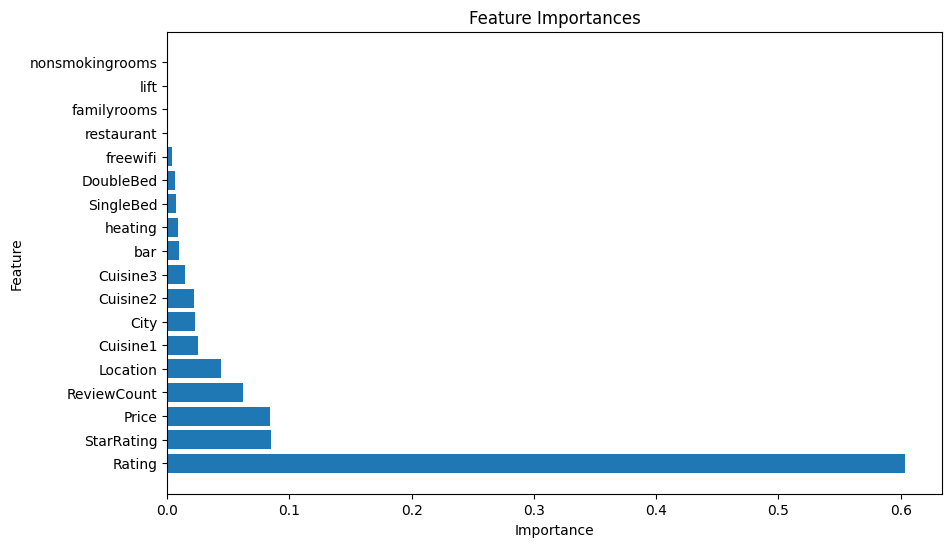

In [82]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [83]:
features_to_drop2 = ["nonsmokingrooms", "lift", "familyrooms", "restaurant", "freewifi","bar","DoubleBed","SingleBed","heating","bar","Cuisine3","Cuisine2","City"]

X1 = X1.drop(features_to_drop2, axis=1)

In [84]:
X_train_review, X_test_review, y_review_train, y_review_test = train_test_split(X1, y_review, test_size=0.2, random_state=42)

In [85]:
X1.head()

,Location,StarRating,Rating,ReviewCount,Cuisine1,Price
0,84,6,8.5,695.0,5,16581.0
1,84,8,7.7,2379.0,0,22990.0
2,84,6,7.9,10400.0,4,11223.0
3,55,6,8.7,2909.0,6,23426.0
4,25,8,8.8,309.0,3,14961.0


In [86]:
y_review.head()

0    5
1    2
2    2
3    1
4    1
Name: ReviewScore, dtype: int64

Hyperparameter Tuning

In [87]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(random_forest, param_grid, cv=cross_val_strategy, scoring='accuracy')
grid_search.fit(X1, y_review)


best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)


tuned_model = grid_search.best_estimator_
tuned_scores = cross_val_score(tuned_model, X1, y_review, cv=cross_val_strategy, scoring='accuracy')
print("\nTuned Random Forest Cross-Validation Scores:")
print(f"Mean Accuracy: {tuned_scores.mean():.2f}")
print(f"Standard Deviation: {tuned_scores.std():.2f}")


from sklearn.metrics import classification_report, confusion_matrix

tuned_model.fit(X1, y_review)
y_pred = tuned_model.predict(X1)
print("\nClassification Report:")
print(classification_report(y_review, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_review, y_pred))

Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100}

Tuned Random Forest Cross-Validation Scores:
Mean Accuracy: 0.99
Standard Deviation: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00       191
           2       1.00      1.00      1.00       398
           3       1.00      1.00      1.00       203
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       690

    accuracy                           1.00      1582
   macro avg       1.00      1.00      1.00      1582
weighted avg       1.00      1.00      1.00      1582


Confusion Matrix:
[[ 11   0   0   0   0   0]
 [  0 191   0   0   0   0]
 [  0   0 398   0   0   0]
 [  0   0   0 203   0   0]
 [  0   0   0   0  89   0]
 [  0   0   0   0   0 690]]


In [88]:
cross_val_scores = cross_val_score(tuned_model, X1, y_review, cv=cross_val_strategy, scoring='accuracy')

print("Cross-Validation Scores:")
print(cross_val_scores)
print(f"Mean Accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard Deviation: {cross_val_scores.std():.2f}")

Cross-Validation Scores:
[0.99369085 0.99369085 0.99367089 0.99367089 0.99683544]
Mean Accuracy: 0.99
Standard Deviation: 0.00


The Random Forest classifier with the tuned hyperparameters has demonstrated a high level of accuracy across different data splits, as indicated by the cross-validation scores. The mean accuracy of approximately 0.99 and the low standard deviation of 0.00 suggest that the model generalizes well and does not exhibit signs of overfitting

Model deployment

In [89]:
import joblib

model_filename = 'review_score_model.pkl'
joblib.dump(tuned_model, model_filename)

['review_score_model.pkl']

In [99]:
new_data = {

    'Location': [84, 84, 84, 55, 25],
    'StarRating': [4.0, 5.0, 4.0, 4.0, 5.0],
    'Rating': [8.5, 7.7, 7.9, 8.7, 8.8],
    'ReviewCount': [695, 2379, 10400, 2909, 309],
    'Cuisine1': ['Local', 'American', 'International', 'Vegan', 'Full English/Irish'],
    'Price': [76581.0, 122990.0, 34000.0, 53426.0, 24961.0]
}

df_c = pd.DataFrame(new_data)
df_c

,Location,StarRating,Rating,ReviewCount,Cuisine1,Price
0,84,4.0,8.5,695,Local,76581.0
1,84,5.0,7.7,2379,American,122990.0
2,84,4.0,7.9,10400,International,34000.0
3,55,4.0,8.7,2909,Vegan,53426.0
4,25,5.0,8.8,309,Full English/Irish,24961.0


In [100]:
for column in new_data:
    df_c[column] = label_encoder.fit_transform(df_c[column])

In [101]:
loaded_model = joblib.load(model_filename)

predictions2 = loaded_model.predict(df_c)
print(predictions2)

[3 3 3 3 3]


3 - Indicates "Pleasant" Review Score